In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, utils as vutils
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

در این بخش، اندازه batch تنظیم شده و تبدیلاتی برای پیش‌پردازش داده‌ها تعریف شده است. سپس داده‌های مجموعه MNIST بارگذاری و با استفاده از DataLoader برای آموزش آماده‌سازی شده‌اند.

In [ ]:
batch_size = 64

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)


 کلاس Generator تعریف شده است که یک شبکه عصبی برای تولید تصاویر MNIST می‌باشد. این شبکه شامل چندین لایه Fully Connected است که از یک بردار نویز با ابعاد 100 به یک تصویر 28x28 تبدیل می‌شود. لایه‌های ReLU برای فعال‌سازی و Tanh برای مقیاس‌بندی خروجی استفاده شده‌اند.
سپس کلاس Discriminator تعریف شده است که یک شبکه عصبی برای تشخیص واقعی یا جعلی بودن تصاویر MNIST می‌باشد. این شبکه شامل چندین لایه Fully Connected است که ورودی تصویر 28x28 را به یک مقدار احتمال (0 یا 1) تبدیل می‌کند. لایه‌های LeakyReLU برای فعال‌سازی و Sigmoid برای مقیاس‌بندی خروجی استفاده شده‌اند.

In [ ]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(True),
            nn.Linear(256, 512),
            nn.ReLU(True),
            nn.Linear(512, 1024),
            nn.ReLU(True),
            nn.Linear(1024, 28*28),
            nn.Tanh()
        )

    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(28*28, 1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.main(x.view(-1, 28*28))


در این بخش، تنظیمات اولیه برای آموزش مدل‌ها انجام شده است:

device: تعیین دستگاه (GPU یا CPU) برای اجرای محاسبات.
G و D: ایجاد نمونه‌هایی از Generator و Discriminator و انتقال آنها به دستگاه محاسباتی.
criterion: تعریف تابع هزینه BCELoss برای محاسبه خطا بین پیش‌بینی‌ها و برچسب‌های واقعی.
optimizerD و optimizerG: تنظیم بهینه‌ساز Adam برای به‌روزرسانی وزن‌های مدل‌های Discriminator و Generator با نرخ یادگیری 0.0002.

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

G = Generator().to(device)
D = Discriminator().to(device)

criterion = nn.BCELoss()

optimizerD = optim.Adam(D.parameters(), lr=0.0002)
optimizerG = optim.Adam(G.parameters(), lr=0.0002)


این بخش شامل حلقه آموزشی GAN است که شامل 50 دوره می‌باشد. در هر دوره:

مدل Discriminator (D) با داده‌های واقعی و جعلی آموزش داده می‌شود.
مدل Generator (G) به‌روزرسانی می‌شود تا تصاویر جعلی واقعی‌تر تولید کند.
تصاویر تولید شده توسط Generator ذخیره و نمایش داده می‌شوند.

Epoch [1/50] Batch 0/938                   Loss D: 0.0025, loss G: 8.0822
Epoch [1/50] Batch 100/938                   Loss D: 0.0509, loss G: 9.2037
Epoch [1/50] Batch 200/938                   Loss D: 0.2238, loss G: 11.4530
Epoch [1/50] Batch 300/938                   Loss D: 0.1219, loss G: 10.8018
Epoch [1/50] Batch 400/938                   Loss D: 0.0293, loss G: 14.4169
Epoch [1/50] Batch 500/938                   Loss D: 0.1068, loss G: 23.3102
Epoch [1/50] Batch 600/938                   Loss D: 1.0094, loss G: 3.7670
Epoch [1/50] Batch 700/938                   Loss D: 0.4186, loss G: 3.5902
Epoch [1/50] Batch 800/938                   Loss D: 0.2380, loss G: 7.5066
Epoch [1/50] Batch 900/938                   Loss D: 0.5885, loss G: 3.3629


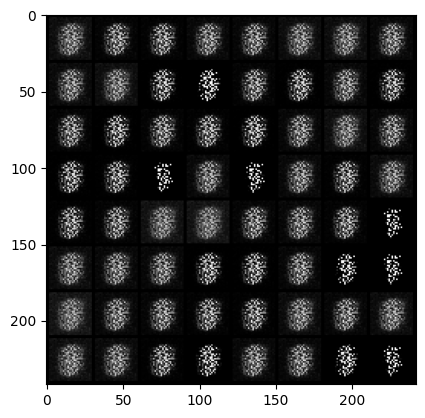

Epoch [2/50] Batch 0/938                   Loss D: 0.4298, loss G: 5.7031
Epoch [2/50] Batch 100/938                   Loss D: 0.0483, loss G: 4.8385
Epoch [2/50] Batch 200/938                   Loss D: 1.7505, loss G: 2.3772
Epoch [2/50] Batch 300/938                   Loss D: 0.7221, loss G: 2.9834
Epoch [2/50] Batch 400/938                   Loss D: 2.0766, loss G: 2.5424
Epoch [2/50] Batch 500/938                   Loss D: 0.3161, loss G: 13.7002
Epoch [2/50] Batch 600/938                   Loss D: 0.6258, loss G: 9.8135
Epoch [2/50] Batch 700/938                   Loss D: 0.9005, loss G: 2.5129
Epoch [2/50] Batch 800/938                   Loss D: 1.4080, loss G: 4.7593
Epoch [2/50] Batch 900/938                   Loss D: 0.5578, loss G: 4.2198


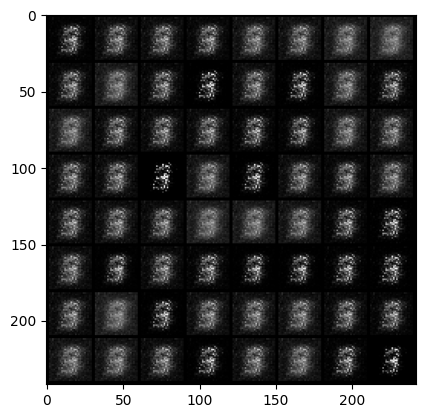

Epoch [3/50] Batch 0/938                   Loss D: 1.1729, loss G: 2.4659
Epoch [3/50] Batch 100/938                   Loss D: 0.8541, loss G: 2.5416
Epoch [3/50] Batch 200/938                   Loss D: 0.9167, loss G: 3.8293
Epoch [3/50] Batch 300/938                   Loss D: 0.9156, loss G: 2.8660
Epoch [3/50] Batch 400/938                   Loss D: 0.5051, loss G: 1.7020
Epoch [3/50] Batch 500/938                   Loss D: 0.0818, loss G: 3.6704
Epoch [3/50] Batch 600/938                   Loss D: 0.2333, loss G: 3.5054
Epoch [3/50] Batch 700/938                   Loss D: 0.3329, loss G: 4.2915
Epoch [3/50] Batch 800/938                   Loss D: 0.7126, loss G: 3.3381
Epoch [3/50] Batch 900/938                   Loss D: 0.4396, loss G: 3.8530


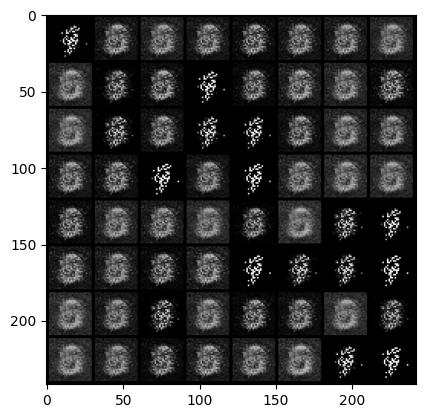

Epoch [4/50] Batch 0/938                   Loss D: 0.2912, loss G: 5.0506
Epoch [4/50] Batch 100/938                   Loss D: 0.2955, loss G: 3.4878
Epoch [4/50] Batch 200/938                   Loss D: 0.1831, loss G: 3.7591
Epoch [4/50] Batch 300/938                   Loss D: 0.4562, loss G: 4.1238
Epoch [4/50] Batch 400/938                   Loss D: 0.4378, loss G: 3.9775
Epoch [4/50] Batch 500/938                   Loss D: 0.2961, loss G: 6.2157
Epoch [4/50] Batch 600/938                   Loss D: 0.3697, loss G: 6.2359
Epoch [4/50] Batch 700/938                   Loss D: 0.1921, loss G: 6.4565
Epoch [4/50] Batch 800/938                   Loss D: 0.2595, loss G: 4.5253
Epoch [4/50] Batch 900/938                   Loss D: 0.2055, loss G: 4.4830


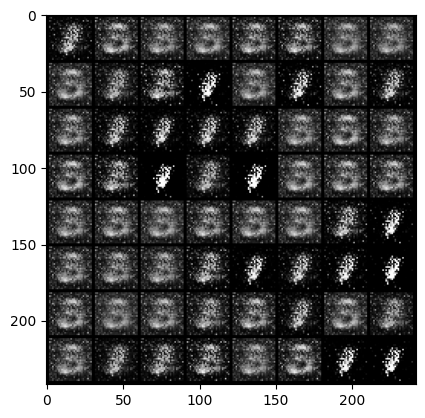

Epoch [5/50] Batch 0/938                   Loss D: 0.2699, loss G: 3.8618
Epoch [5/50] Batch 100/938                   Loss D: 0.1571, loss G: 5.0076
Epoch [5/50] Batch 200/938                   Loss D: 0.2117, loss G: 3.6988
Epoch [5/50] Batch 300/938                   Loss D: 0.3036, loss G: 3.1662
Epoch [5/50] Batch 400/938                   Loss D: 0.1997, loss G: 5.4116
Epoch [5/50] Batch 500/938                   Loss D: 0.2642, loss G: 6.9215
Epoch [5/50] Batch 600/938                   Loss D: 0.1457, loss G: 5.4702
Epoch [5/50] Batch 700/938                   Loss D: 0.2278, loss G: 5.4448
Epoch [5/50] Batch 800/938                   Loss D: 0.4095, loss G: 5.7793
Epoch [5/50] Batch 900/938                   Loss D: 0.1243, loss G: 7.8151


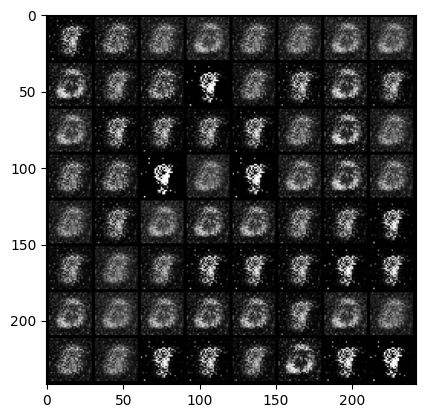

Epoch [6/50] Batch 0/938                   Loss D: 0.6161, loss G: 5.2841
Epoch [6/50] Batch 100/938                   Loss D: 0.1095, loss G: 5.0383
Epoch [6/50] Batch 200/938                   Loss D: 0.8074, loss G: 4.4909
Epoch [6/50] Batch 300/938                   Loss D: 0.2470, loss G: 7.3724
Epoch [6/50] Batch 400/938                   Loss D: 0.2835, loss G: 4.2319
Epoch [6/50] Batch 500/938                   Loss D: 0.1842, loss G: 4.7401
Epoch [6/50] Batch 600/938                   Loss D: 0.2169, loss G: 3.8820
Epoch [6/50] Batch 700/938                   Loss D: 0.1520, loss G: 4.9868
Epoch [6/50] Batch 800/938                   Loss D: 0.0165, loss G: 7.0843
Epoch [6/50] Batch 900/938                   Loss D: 0.3161, loss G: 4.7628


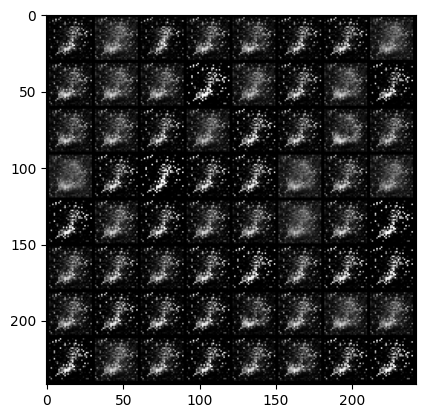

Epoch [7/50] Batch 0/938                   Loss D: 0.5950, loss G: 5.8472
Epoch [7/50] Batch 100/938                   Loss D: 0.2715, loss G: 4.3936
Epoch [7/50] Batch 200/938                   Loss D: 0.1703, loss G: 4.5531
Epoch [7/50] Batch 300/938                   Loss D: 0.6846, loss G: 6.5497
Epoch [7/50] Batch 400/938                   Loss D: 0.2122, loss G: 7.6539
Epoch [7/50] Batch 500/938                   Loss D: 0.0534, loss G: 5.3579
Epoch [7/50] Batch 600/938                   Loss D: 0.4037, loss G: 3.5618
Epoch [7/50] Batch 700/938                   Loss D: 0.2950, loss G: 4.4279
Epoch [7/50] Batch 800/938                   Loss D: 0.0220, loss G: 9.1394
Epoch [7/50] Batch 900/938                   Loss D: 1.0901, loss G: 6.3218


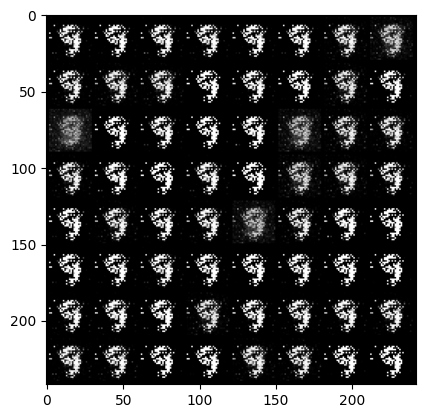

Epoch [8/50] Batch 0/938                   Loss D: 0.0272, loss G: 5.9167
Epoch [8/50] Batch 100/938                   Loss D: 0.1564, loss G: 10.3900
Epoch [8/50] Batch 200/938                   Loss D: 0.1120, loss G: 6.0244
Epoch [8/50] Batch 300/938                   Loss D: 0.3886, loss G: 5.4451
Epoch [8/50] Batch 400/938                   Loss D: 0.6425, loss G: 5.5742
Epoch [8/50] Batch 500/938                   Loss D: 0.1695, loss G: 7.2661
Epoch [8/50] Batch 600/938                   Loss D: 0.2879, loss G: 4.1077
Epoch [8/50] Batch 700/938                   Loss D: 0.1165, loss G: 3.7960
Epoch [8/50] Batch 800/938                   Loss D: 0.1846, loss G: 4.8260
Epoch [8/50] Batch 900/938                   Loss D: 0.0898, loss G: 7.0185


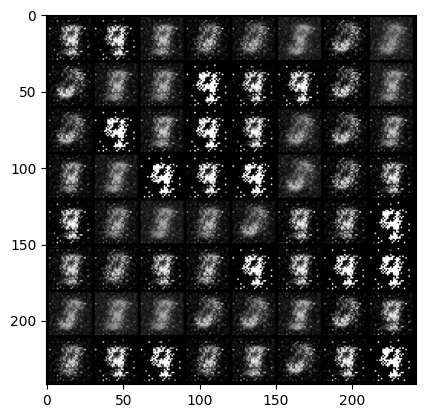

Epoch [9/50] Batch 0/938                   Loss D: 0.2982, loss G: 7.6008
Epoch [9/50] Batch 100/938                   Loss D: 0.1138, loss G: 4.7894
Epoch [9/50] Batch 200/938                   Loss D: 0.1945, loss G: 5.3354
Epoch [9/50] Batch 300/938                   Loss D: 0.4083, loss G: 4.6102
Epoch [9/50] Batch 400/938                   Loss D: 0.1356, loss G: 5.8209
Epoch [9/50] Batch 500/938                   Loss D: 0.2132, loss G: 6.5047
Epoch [9/50] Batch 600/938                   Loss D: 0.2675, loss G: 6.7180
Epoch [9/50] Batch 700/938                   Loss D: 0.1966, loss G: 5.2044
Epoch [9/50] Batch 800/938                   Loss D: 0.3479, loss G: 4.0146
Epoch [9/50] Batch 900/938                   Loss D: 0.3356, loss G: 4.0659


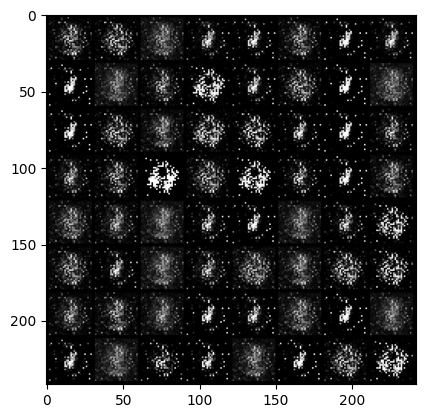

Epoch [10/50] Batch 0/938                   Loss D: 0.2437, loss G: 5.6588
Epoch [10/50] Batch 100/938                   Loss D: 0.2842, loss G: 5.5867
Epoch [10/50] Batch 200/938                   Loss D: 0.1452, loss G: 4.1250
Epoch [10/50] Batch 300/938                   Loss D: 0.5119, loss G: 3.1627
Epoch [10/50] Batch 400/938                   Loss D: 0.1062, loss G: 5.1176
Epoch [10/50] Batch 500/938                   Loss D: 0.4420, loss G: 4.5180
Epoch [10/50] Batch 600/938                   Loss D: 0.2484, loss G: 4.8101
Epoch [10/50] Batch 700/938                   Loss D: 0.4151, loss G: 5.1020
Epoch [10/50] Batch 800/938                   Loss D: 0.0966, loss G: 5.6469
Epoch [10/50] Batch 900/938                   Loss D: 0.3698, loss G: 5.2829


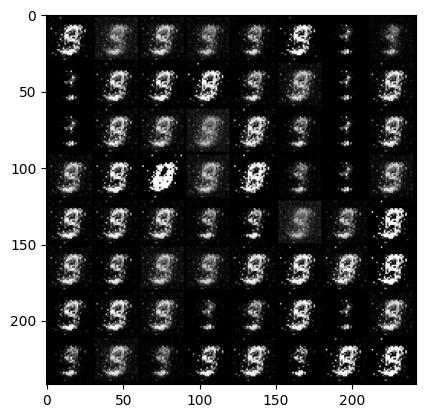

Epoch [11/50] Batch 0/938                   Loss D: 0.2827, loss G: 4.1374
Epoch [11/50] Batch 100/938                   Loss D: 0.0972, loss G: 6.0323
Epoch [11/50] Batch 200/938                   Loss D: 0.1864, loss G: 4.4137
Epoch [11/50] Batch 300/938                   Loss D: 0.1348, loss G: 5.3434
Epoch [11/50] Batch 400/938                   Loss D: 0.2395, loss G: 2.8288
Epoch [11/50] Batch 500/938                   Loss D: 0.2176, loss G: 5.5823
Epoch [11/50] Batch 600/938                   Loss D: 0.1456, loss G: 4.9431
Epoch [11/50] Batch 700/938                   Loss D: 0.5109, loss G: 3.8308
Epoch [11/50] Batch 800/938                   Loss D: 0.1300, loss G: 4.9115
Epoch [11/50] Batch 900/938                   Loss D: 0.1308, loss G: 6.1311


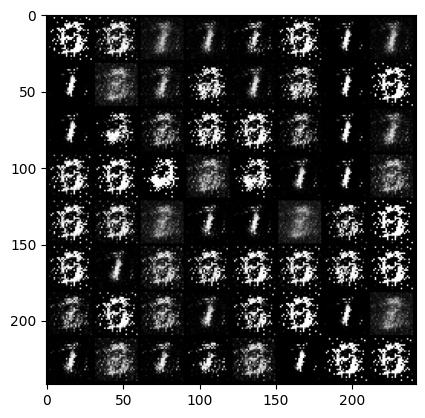

Epoch [12/50] Batch 0/938                   Loss D: 0.2260, loss G: 6.0607
Epoch [12/50] Batch 100/938                   Loss D: 0.1877, loss G: 4.4693
Epoch [12/50] Batch 200/938                   Loss D: 0.0518, loss G: 6.9743
Epoch [12/50] Batch 300/938                   Loss D: 0.2619, loss G: 4.1360
Epoch [12/50] Batch 400/938                   Loss D: 0.1477, loss G: 6.4509
Epoch [12/50] Batch 500/938                   Loss D: 0.3213, loss G: 5.0158
Epoch [12/50] Batch 600/938                   Loss D: 0.1280, loss G: 5.1827
Epoch [12/50] Batch 700/938                   Loss D: 0.1733, loss G: 5.6698
Epoch [12/50] Batch 800/938                   Loss D: 0.2392, loss G: 5.0340
Epoch [12/50] Batch 900/938                   Loss D: 0.2544, loss G: 5.6126


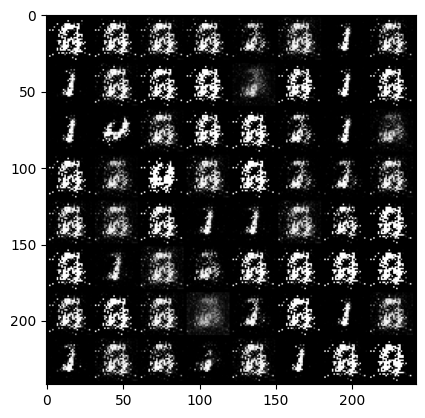

Epoch [13/50] Batch 0/938                   Loss D: 0.3042, loss G: 3.0004
Epoch [13/50] Batch 100/938                   Loss D: 0.1839, loss G: 6.9753
Epoch [13/50] Batch 200/938                   Loss D: 0.2857, loss G: 5.2986
Epoch [13/50] Batch 300/938                   Loss D: 0.1712, loss G: 4.7743
Epoch [13/50] Batch 400/938                   Loss D: 0.2930, loss G: 6.7487
Epoch [13/50] Batch 500/938                   Loss D: 0.3325, loss G: 5.5493
Epoch [13/50] Batch 600/938                   Loss D: 0.1684, loss G: 3.9453
Epoch [13/50] Batch 700/938                   Loss D: 0.0888, loss G: 5.3289
Epoch [13/50] Batch 800/938                   Loss D: 0.3660, loss G: 5.4555
Epoch [13/50] Batch 900/938                   Loss D: 0.2714, loss G: 4.7444


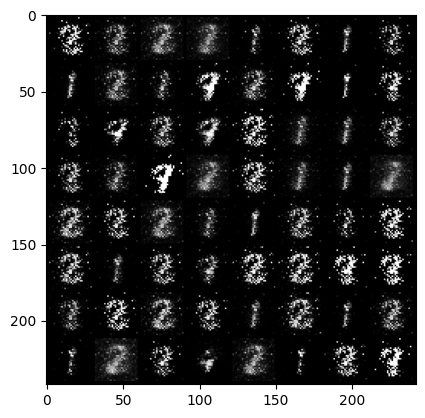

Epoch [14/50] Batch 0/938                   Loss D: 0.3970, loss G: 5.8459
Epoch [14/50] Batch 100/938                   Loss D: 0.3543, loss G: 4.3806
Epoch [14/50] Batch 200/938                   Loss D: 0.1087, loss G: 5.5270
Epoch [14/50] Batch 300/938                   Loss D: 0.4785, loss G: 6.2591
Epoch [14/50] Batch 400/938                   Loss D: 0.2100, loss G: 4.7610
Epoch [14/50] Batch 500/938                   Loss D: 0.0620, loss G: 7.6327
Epoch [14/50] Batch 600/938                   Loss D: 0.3783, loss G: 6.2332
Epoch [14/50] Batch 700/938                   Loss D: 0.2136, loss G: 6.6766
Epoch [14/50] Batch 800/938                   Loss D: 0.2515, loss G: 4.0444
Epoch [14/50] Batch 900/938                   Loss D: 0.1458, loss G: 5.1103


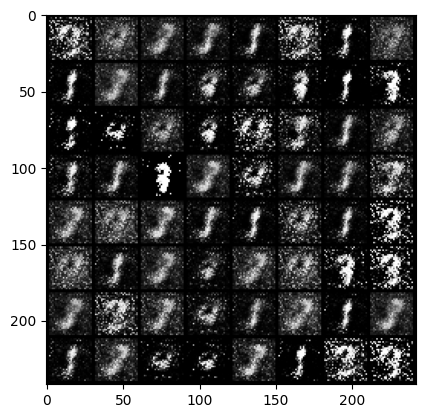

Epoch [15/50] Batch 0/938                   Loss D: 0.1357, loss G: 3.9455
Epoch [15/50] Batch 100/938                   Loss D: 0.5988, loss G: 3.8264
Epoch [15/50] Batch 200/938                   Loss D: 0.3410, loss G: 5.5292
Epoch [15/50] Batch 300/938                   Loss D: 0.3235, loss G: 4.7422
Epoch [15/50] Batch 400/938                   Loss D: 0.2417, loss G: 2.7597
Epoch [15/50] Batch 500/938                   Loss D: 0.3887, loss G: 5.9046
Epoch [15/50] Batch 600/938                   Loss D: 0.3295, loss G: 3.0794
Epoch [15/50] Batch 700/938                   Loss D: 0.1772, loss G: 4.0575
Epoch [15/50] Batch 800/938                   Loss D: 0.1882, loss G: 4.9082
Epoch [15/50] Batch 900/938                   Loss D: 0.1853, loss G: 3.9033


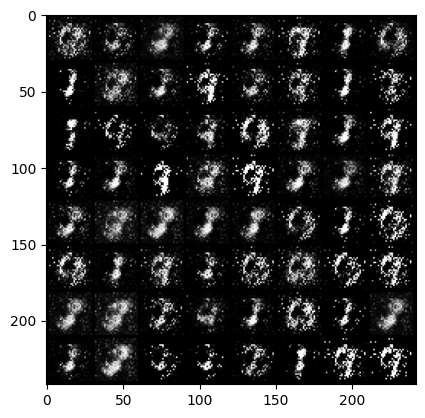

Epoch [16/50] Batch 0/938                   Loss D: 0.1519, loss G: 4.2622
Epoch [16/50] Batch 100/938                   Loss D: 0.2017, loss G: 4.4160
Epoch [16/50] Batch 200/938                   Loss D: 0.2025, loss G: 2.7764
Epoch [16/50] Batch 300/938                   Loss D: 0.2895, loss G: 3.5892
Epoch [16/50] Batch 400/938                   Loss D: 0.4354, loss G: 3.6493
Epoch [16/50] Batch 500/938                   Loss D: 0.4452, loss G: 1.7878
Epoch [16/50] Batch 600/938                   Loss D: 0.3169, loss G: 3.4263
Epoch [16/50] Batch 700/938                   Loss D: 0.2844, loss G: 5.0771
Epoch [16/50] Batch 800/938                   Loss D: 0.2650, loss G: 3.1128
Epoch [16/50] Batch 900/938                   Loss D: 0.2728, loss G: 3.5166


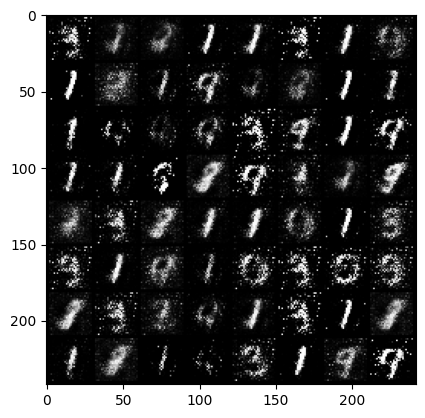

Epoch [17/50] Batch 0/938                   Loss D: 0.2147, loss G: 4.6093
Epoch [17/50] Batch 100/938                   Loss D: 0.2496, loss G: 6.8439
Epoch [17/50] Batch 200/938                   Loss D: 0.6496, loss G: 3.2385
Epoch [17/50] Batch 300/938                   Loss D: 0.2816, loss G: 5.2506
Epoch [17/50] Batch 400/938                   Loss D: 0.7384, loss G: 3.5148
Epoch [17/50] Batch 500/938                   Loss D: 0.4751, loss G: 4.1473
Epoch [17/50] Batch 600/938                   Loss D: 0.2409, loss G: 4.3389
Epoch [17/50] Batch 700/938                   Loss D: 0.3547, loss G: 3.1763
Epoch [17/50] Batch 800/938                   Loss D: 0.3564, loss G: 3.7781
Epoch [17/50] Batch 900/938                   Loss D: 0.2177, loss G: 4.0894


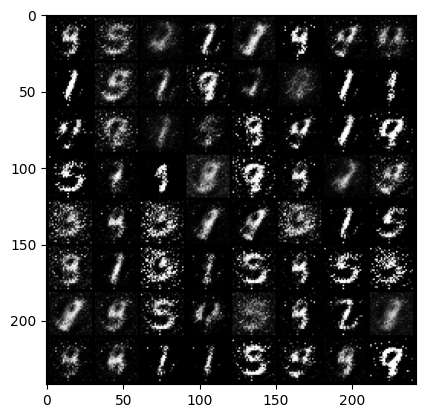

Epoch [18/50] Batch 0/938                   Loss D: 0.4521, loss G: 3.1088
Epoch [18/50] Batch 100/938                   Loss D: 0.4001, loss G: 4.0404
Epoch [18/50] Batch 200/938                   Loss D: 0.3379, loss G: 5.2312
Epoch [18/50] Batch 300/938                   Loss D: 0.4372, loss G: 3.0425
Epoch [18/50] Batch 400/938                   Loss D: 0.3776, loss G: 2.9214
Epoch [18/50] Batch 500/938                   Loss D: 0.2484, loss G: 4.0614
Epoch [18/50] Batch 600/938                   Loss D: 0.2105, loss G: 4.3684
Epoch [18/50] Batch 700/938                   Loss D: 0.2889, loss G: 3.9371
Epoch [18/50] Batch 800/938                   Loss D: 0.2301, loss G: 3.6433
Epoch [18/50] Batch 900/938                   Loss D: 0.4007, loss G: 3.9967


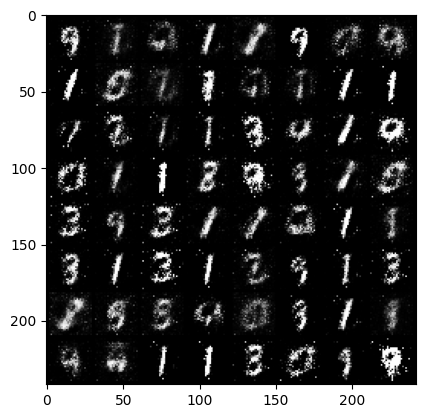

Epoch [19/50] Batch 0/938                   Loss D: 0.5845, loss G: 4.3111
Epoch [19/50] Batch 100/938                   Loss D: 0.1954, loss G: 3.5464
Epoch [19/50] Batch 200/938                   Loss D: 0.3937, loss G: 2.8725
Epoch [19/50] Batch 300/938                   Loss D: 0.3420, loss G: 4.6657
Epoch [19/50] Batch 400/938                   Loss D: 0.3416, loss G: 3.6264
Epoch [19/50] Batch 500/938                   Loss D: 0.3740, loss G: 4.2734
Epoch [19/50] Batch 600/938                   Loss D: 0.2644, loss G: 3.7759
Epoch [19/50] Batch 700/938                   Loss D: 0.2194, loss G: 3.2316
Epoch [19/50] Batch 800/938                   Loss D: 0.3371, loss G: 2.4821
Epoch [19/50] Batch 900/938                   Loss D: 0.2626, loss G: 4.2121


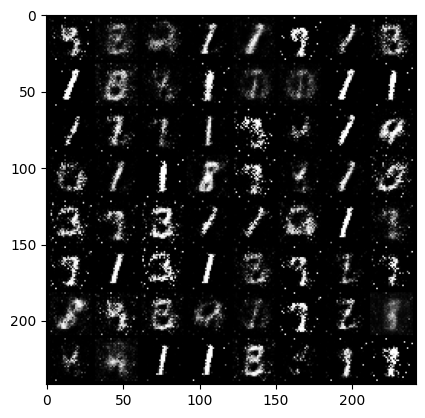

Epoch [20/50] Batch 0/938                   Loss D: 0.3557, loss G: 3.8453
Epoch [20/50] Batch 100/938                   Loss D: 0.3511, loss G: 3.6874
Epoch [20/50] Batch 200/938                   Loss D: 0.3192, loss G: 3.8104
Epoch [20/50] Batch 300/938                   Loss D: 0.4058, loss G: 3.3177
Epoch [20/50] Batch 400/938                   Loss D: 0.3383, loss G: 3.8173
Epoch [20/50] Batch 500/938                   Loss D: 0.4366, loss G: 2.9772
Epoch [20/50] Batch 600/938                   Loss D: 0.5386, loss G: 3.6920
Epoch [20/50] Batch 700/938                   Loss D: 0.5324, loss G: 2.6733
Epoch [20/50] Batch 800/938                   Loss D: 0.2895, loss G: 2.6669
Epoch [20/50] Batch 900/938                   Loss D: 0.4706, loss G: 3.2233


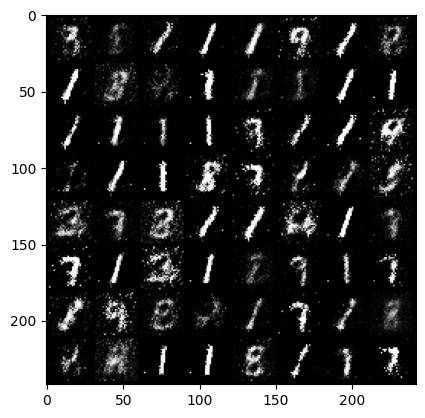

Epoch [21/50] Batch 0/938                   Loss D: 0.3128, loss G: 3.1694
Epoch [21/50] Batch 100/938                   Loss D: 0.2847, loss G: 3.5277
Epoch [21/50] Batch 200/938                   Loss D: 0.1424, loss G: 4.7881
Epoch [21/50] Batch 300/938                   Loss D: 0.4428, loss G: 3.0373
Epoch [21/50] Batch 400/938                   Loss D: 0.4104, loss G: 3.0112
Epoch [21/50] Batch 500/938                   Loss D: 0.2814, loss G: 2.3979
Epoch [21/50] Batch 600/938                   Loss D: 0.5342, loss G: 3.4284
Epoch [21/50] Batch 700/938                   Loss D: 0.2358, loss G: 3.6559
Epoch [21/50] Batch 800/938                   Loss D: 0.4912, loss G: 3.0830
Epoch [21/50] Batch 900/938                   Loss D: 0.7396, loss G: 2.1158


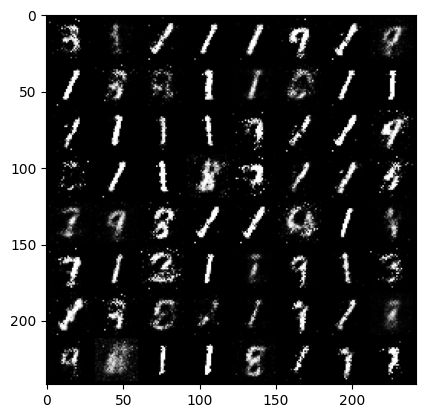

Epoch [22/50] Batch 0/938                   Loss D: 0.6018, loss G: 1.6740
Epoch [22/50] Batch 100/938                   Loss D: 0.4745, loss G: 2.5666
Epoch [22/50] Batch 200/938                   Loss D: 0.4174, loss G: 3.0683
Epoch [22/50] Batch 300/938                   Loss D: 0.6297, loss G: 2.4400
Epoch [22/50] Batch 400/938                   Loss D: 0.5639, loss G: 2.4884
Epoch [22/50] Batch 500/938                   Loss D: 0.5075, loss G: 2.0911
Epoch [22/50] Batch 600/938                   Loss D: 0.5263, loss G: 3.3208
Epoch [22/50] Batch 700/938                   Loss D: 0.4108, loss G: 3.9898
Epoch [22/50] Batch 800/938                   Loss D: 0.5356, loss G: 2.5442
Epoch [22/50] Batch 900/938                   Loss D: 0.4691, loss G: 2.4924


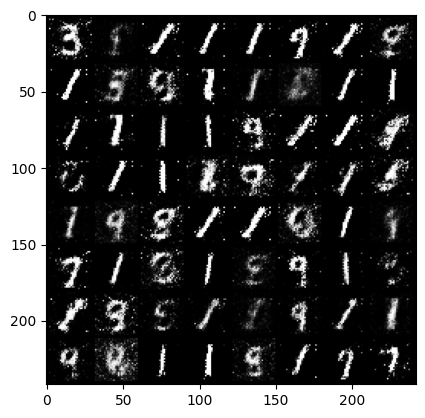

Epoch [23/50] Batch 0/938                   Loss D: 0.3393, loss G: 3.7404
Epoch [23/50] Batch 100/938                   Loss D: 1.0344, loss G: 3.5238
Epoch [23/50] Batch 200/938                   Loss D: 0.4478, loss G: 3.6364
Epoch [23/50] Batch 300/938                   Loss D: 0.4847, loss G: 3.8360
Epoch [23/50] Batch 400/938                   Loss D: 0.3906, loss G: 3.1666
Epoch [23/50] Batch 500/938                   Loss D: 0.5139, loss G: 2.5677
Epoch [23/50] Batch 600/938                   Loss D: 0.6552, loss G: 3.5267
Epoch [23/50] Batch 700/938                   Loss D: 0.5281, loss G: 3.7995
Epoch [23/50] Batch 800/938                   Loss D: 0.4925, loss G: 2.9690
Epoch [23/50] Batch 900/938                   Loss D: 0.3522, loss G: 2.7840


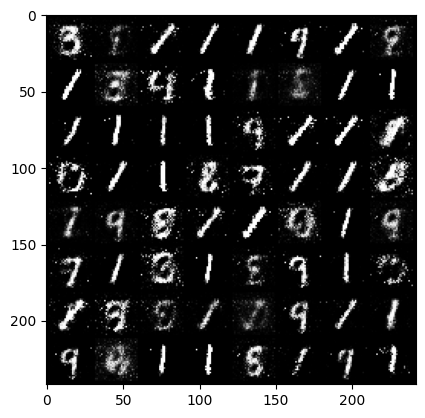

Epoch [24/50] Batch 0/938                   Loss D: 0.4398, loss G: 3.0057
Epoch [24/50] Batch 100/938                   Loss D: 0.4037, loss G: 3.1886
Epoch [24/50] Batch 200/938                   Loss D: 0.6326, loss G: 3.4941
Epoch [24/50] Batch 300/938                   Loss D: 0.3318, loss G: 3.4197
Epoch [24/50] Batch 400/938                   Loss D: 0.3636, loss G: 3.8219
Epoch [24/50] Batch 500/938                   Loss D: 0.3770, loss G: 3.6058
Epoch [24/50] Batch 600/938                   Loss D: 0.5775, loss G: 2.2450
Epoch [24/50] Batch 700/938                   Loss D: 0.4343, loss G: 2.5160
Epoch [24/50] Batch 800/938                   Loss D: 0.4448, loss G: 2.3062
Epoch [24/50] Batch 900/938                   Loss D: 0.3682, loss G: 2.9630


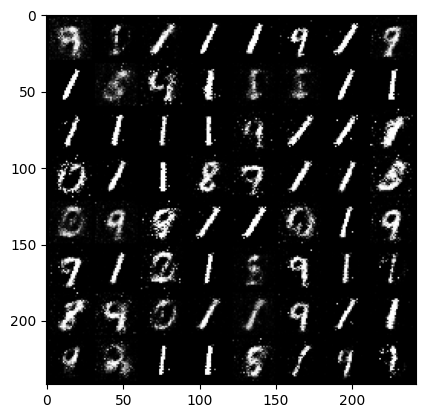

Epoch [25/50] Batch 0/938                   Loss D: 0.3065, loss G: 2.9502
Epoch [25/50] Batch 100/938                   Loss D: 0.4685, loss G: 2.4717
Epoch [25/50] Batch 200/938                   Loss D: 0.6286, loss G: 2.8188
Epoch [25/50] Batch 300/938                   Loss D: 0.4289, loss G: 2.5362
Epoch [25/50] Batch 400/938                   Loss D: 0.5989, loss G: 2.9869
Epoch [25/50] Batch 500/938                   Loss D: 0.5721, loss G: 3.7557
Epoch [25/50] Batch 600/938                   Loss D: 0.6785, loss G: 1.7193
Epoch [25/50] Batch 700/938                   Loss D: 0.4858, loss G: 2.8099
Epoch [25/50] Batch 800/938                   Loss D: 0.6230, loss G: 2.9588
Epoch [25/50] Batch 900/938                   Loss D: 0.5162, loss G: 2.8388


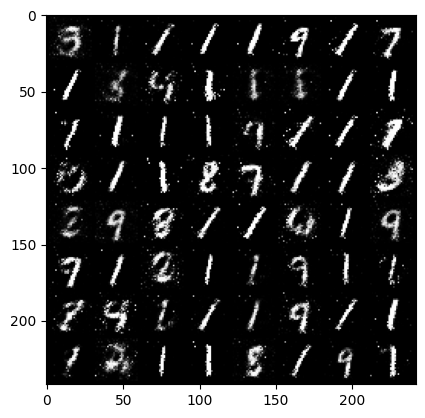

Epoch [26/50] Batch 0/938                   Loss D: 0.8099, loss G: 1.4456
Epoch [26/50] Batch 100/938                   Loss D: 0.5830, loss G: 2.9600
Epoch [26/50] Batch 200/938                   Loss D: 0.4724, loss G: 3.1284
Epoch [26/50] Batch 300/938                   Loss D: 0.7270, loss G: 2.6935
Epoch [26/50] Batch 400/938                   Loss D: 0.4887, loss G: 2.5602
Epoch [26/50] Batch 500/938                   Loss D: 0.5748, loss G: 2.0591
Epoch [26/50] Batch 600/938                   Loss D: 0.6064, loss G: 1.9835
Epoch [26/50] Batch 700/938                   Loss D: 0.7059, loss G: 2.0169
Epoch [26/50] Batch 800/938                   Loss D: 0.7031, loss G: 2.1749
Epoch [26/50] Batch 900/938                   Loss D: 0.6647, loss G: 2.0636


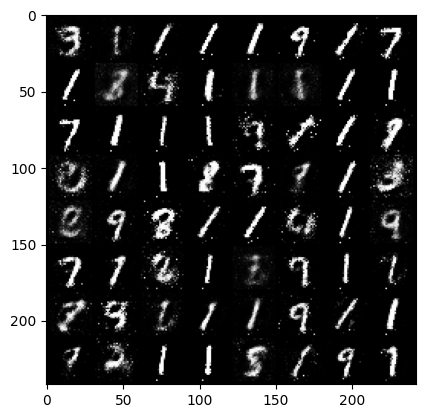

Epoch [27/50] Batch 0/938                   Loss D: 0.5592, loss G: 2.2929
Epoch [27/50] Batch 100/938                   Loss D: 0.6491, loss G: 2.2392
Epoch [27/50] Batch 200/938                   Loss D: 0.5185, loss G: 2.7655
Epoch [27/50] Batch 300/938                   Loss D: 0.7130, loss G: 1.7289
Epoch [27/50] Batch 400/938                   Loss D: 0.6200, loss G: 3.5110
Epoch [27/50] Batch 500/938                   Loss D: 0.5993, loss G: 2.2173
Epoch [27/50] Batch 600/938                   Loss D: 0.4559, loss G: 3.0406
Epoch [27/50] Batch 700/938                   Loss D: 0.4632, loss G: 2.5098
Epoch [27/50] Batch 800/938                   Loss D: 0.5521, loss G: 2.4427
Epoch [27/50] Batch 900/938                   Loss D: 0.5903, loss G: 2.5230


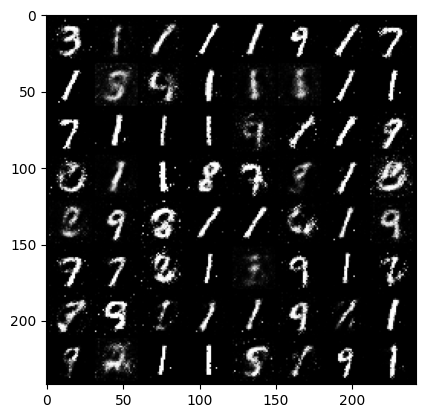

Epoch [28/50] Batch 0/938                   Loss D: 0.5433, loss G: 2.3327
Epoch [28/50] Batch 100/938                   Loss D: 0.7818, loss G: 2.7623
Epoch [28/50] Batch 200/938                   Loss D: 0.5998, loss G: 2.7775
Epoch [28/50] Batch 300/938                   Loss D: 0.7067, loss G: 1.6918
Epoch [28/50] Batch 400/938                   Loss D: 0.7401, loss G: 2.4812
Epoch [28/50] Batch 500/938                   Loss D: 0.5099, loss G: 2.1021
Epoch [28/50] Batch 600/938                   Loss D: 0.6622, loss G: 2.2972
Epoch [28/50] Batch 700/938                   Loss D: 0.6548, loss G: 2.5731
Epoch [28/50] Batch 800/938                   Loss D: 0.6611, loss G: 2.5778
Epoch [28/50] Batch 900/938                   Loss D: 0.5955, loss G: 2.5117


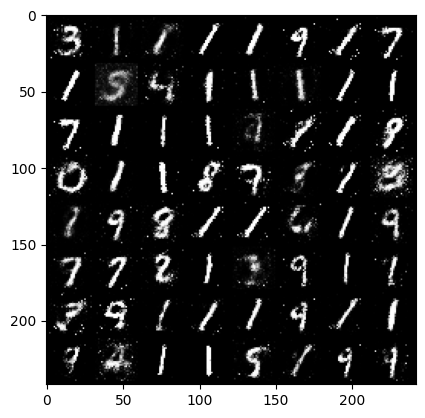

Epoch [29/50] Batch 0/938                   Loss D: 0.8673, loss G: 2.1880
Epoch [29/50] Batch 100/938                   Loss D: 0.6941, loss G: 2.3040
Epoch [29/50] Batch 200/938                   Loss D: 0.6739, loss G: 2.3599
Epoch [29/50] Batch 300/938                   Loss D: 0.7439, loss G: 2.2172
Epoch [29/50] Batch 400/938                   Loss D: 0.8115, loss G: 2.4809
Epoch [29/50] Batch 500/938                   Loss D: 1.0082, loss G: 1.8524
Epoch [29/50] Batch 600/938                   Loss D: 0.4744, loss G: 2.5138
Epoch [29/50] Batch 700/938                   Loss D: 0.5324, loss G: 2.1666
Epoch [29/50] Batch 800/938                   Loss D: 0.6339, loss G: 2.8833
Epoch [29/50] Batch 900/938                   Loss D: 0.5536, loss G: 1.8786


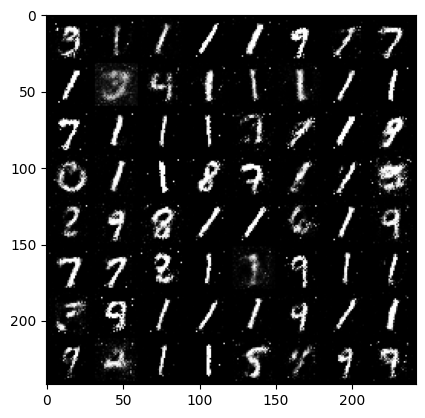

Epoch [30/50] Batch 0/938                   Loss D: 0.5040, loss G: 2.5028
Epoch [30/50] Batch 100/938                   Loss D: 0.6782, loss G: 2.5138
Epoch [30/50] Batch 200/938                   Loss D: 0.5426, loss G: 2.3100
Epoch [30/50] Batch 300/938                   Loss D: 0.7105, loss G: 3.0137
Epoch [30/50] Batch 400/938                   Loss D: 0.7469, loss G: 1.9349
Epoch [30/50] Batch 500/938                   Loss D: 0.6520, loss G: 3.2404
Epoch [30/50] Batch 600/938                   Loss D: 0.7501, loss G: 2.1137
Epoch [30/50] Batch 700/938                   Loss D: 0.5499, loss G: 2.6714
Epoch [30/50] Batch 800/938                   Loss D: 0.6168, loss G: 1.7463
Epoch [30/50] Batch 900/938                   Loss D: 0.7015, loss G: 1.9836


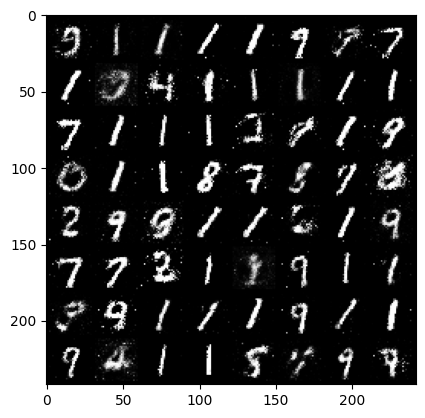

Epoch [31/50] Batch 0/938                   Loss D: 0.7538, loss G: 2.3610
Epoch [31/50] Batch 100/938                   Loss D: 0.5188, loss G: 2.0825
Epoch [31/50] Batch 200/938                   Loss D: 1.1830, loss G: 1.9845
Epoch [31/50] Batch 400/938                   Loss D: 0.9614, loss G: 2.0269
Epoch [31/50] Batch 500/938                   Loss D: 0.7937, loss G: 1.5775
Epoch [31/50] Batch 600/938                   Loss D: 0.5279, loss G: 2.4570
Epoch [31/50] Batch 700/938                   Loss D: 0.7038, loss G: 1.8853
Epoch [31/50] Batch 800/938                   Loss D: 0.6915, loss G: 1.7522
Epoch [31/50] Batch 900/938                   Loss D: 0.5118, loss G: 1.9370


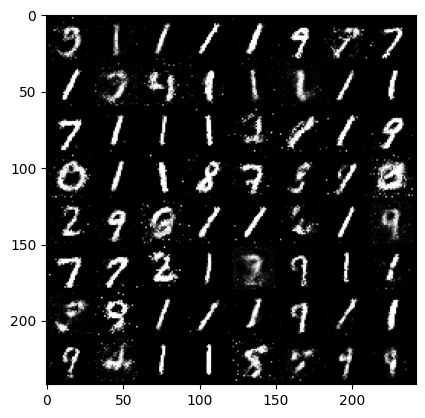

Epoch [32/50] Batch 0/938                   Loss D: 0.9759, loss G: 2.0798
Epoch [32/50] Batch 100/938                   Loss D: 0.7273, loss G: 1.7748
Epoch [32/50] Batch 200/938                   Loss D: 0.7345, loss G: 1.7609
Epoch [32/50] Batch 300/938                   Loss D: 0.5473, loss G: 2.1274
Epoch [32/50] Batch 400/938                   Loss D: 0.6891, loss G: 1.8562
Epoch [32/50] Batch 500/938                   Loss D: 0.5186, loss G: 2.4639
Epoch [32/50] Batch 600/938                   Loss D: 0.5684, loss G: 2.6980
Epoch [32/50] Batch 700/938                   Loss D: 0.5637, loss G: 2.0447
Epoch [32/50] Batch 800/938                   Loss D: 0.6301, loss G: 2.1767
Epoch [32/50] Batch 900/938                   Loss D: 0.7809, loss G: 2.0672


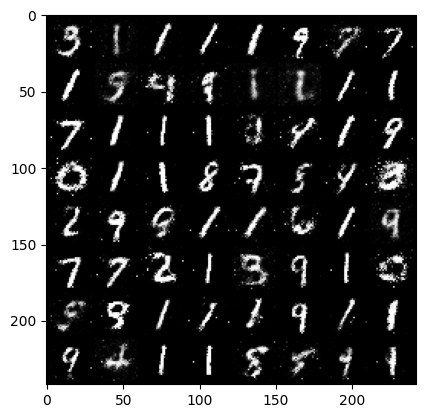

Epoch [33/50] Batch 0/938                   Loss D: 0.8627, loss G: 1.9259
Epoch [33/50] Batch 100/938                   Loss D: 0.7367, loss G: 2.1595
Epoch [33/50] Batch 200/938                   Loss D: 0.7695, loss G: 2.1738
Epoch [33/50] Batch 300/938                   Loss D: 0.5797, loss G: 2.4631
Epoch [33/50] Batch 400/938                   Loss D: 0.7480, loss G: 1.9502
Epoch [33/50] Batch 500/938                   Loss D: 0.9115, loss G: 1.2596
Epoch [33/50] Batch 600/938                   Loss D: 0.8664, loss G: 1.7637
Epoch [33/50] Batch 700/938                   Loss D: 0.6628, loss G: 1.8754
Epoch [33/50] Batch 800/938                   Loss D: 0.4739, loss G: 3.0529
Epoch [33/50] Batch 900/938                   Loss D: 0.5939, loss G: 2.6117


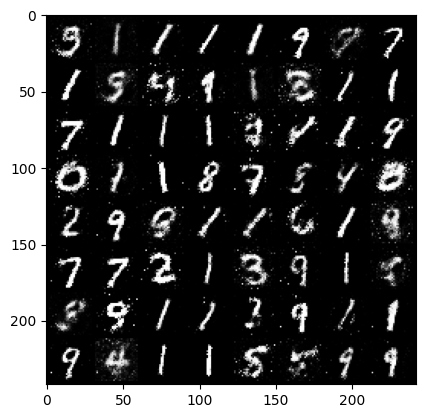

Epoch [34/50] Batch 0/938                   Loss D: 0.8563, loss G: 1.8305
Epoch [34/50] Batch 100/938                   Loss D: 0.6163, loss G: 1.4042
Epoch [34/50] Batch 200/938                   Loss D: 0.6770, loss G: 1.7152
Epoch [34/50] Batch 300/938                   Loss D: 0.5049, loss G: 2.2032
Epoch [34/50] Batch 400/938                   Loss D: 0.3939, loss G: 2.6212
Epoch [34/50] Batch 500/938                   Loss D: 0.7007, loss G: 1.5599
Epoch [34/50] Batch 600/938                   Loss D: 0.5680, loss G: 2.1949
Epoch [34/50] Batch 700/938                   Loss D: 0.6847, loss G: 2.1934
Epoch [34/50] Batch 800/938                   Loss D: 0.5069, loss G: 2.0672
Epoch [34/50] Batch 900/938                   Loss D: 0.8913, loss G: 2.3312


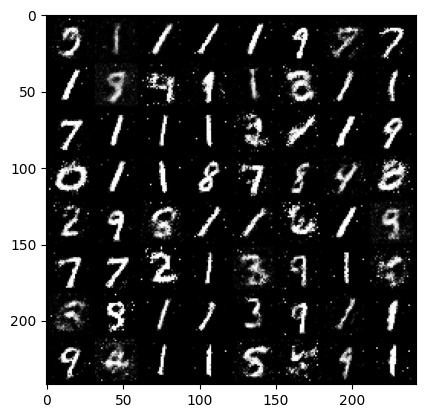

Epoch [35/50] Batch 0/938                   Loss D: 0.9021, loss G: 1.9811
Epoch [35/50] Batch 100/938                   Loss D: 0.6968, loss G: 1.7885
Epoch [35/50] Batch 200/938                   Loss D: 0.9621, loss G: 2.5045
Epoch [35/50] Batch 300/938                   Loss D: 0.8394, loss G: 1.7245
Epoch [35/50] Batch 400/938                   Loss D: 0.6344, loss G: 2.3304
Epoch [35/50] Batch 500/938                   Loss D: 0.9653, loss G: 1.3259
Epoch [35/50] Batch 600/938                   Loss D: 1.0785, loss G: 1.9728
Epoch [35/50] Batch 700/938                   Loss D: 0.7947, loss G: 1.9733
Epoch [35/50] Batch 800/938                   Loss D: 0.8958, loss G: 1.5485
Epoch [35/50] Batch 900/938                   Loss D: 0.7458, loss G: 2.2618


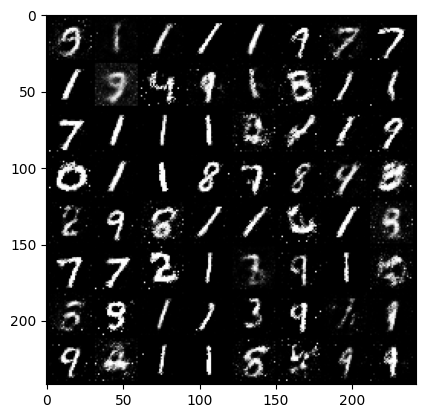

Epoch [36/50] Batch 0/938                   Loss D: 0.8190, loss G: 1.6023
Epoch [36/50] Batch 100/938                   Loss D: 0.8266, loss G: 2.2731
Epoch [36/50] Batch 200/938                   Loss D: 0.6428, loss G: 2.0171
Epoch [36/50] Batch 300/938                   Loss D: 0.9085, loss G: 1.4768
Epoch [36/50] Batch 400/938                   Loss D: 0.9201, loss G: 1.8756
Epoch [36/50] Batch 500/938                   Loss D: 0.8517, loss G: 1.8243
Epoch [36/50] Batch 600/938                   Loss D: 0.8709, loss G: 2.6712
Epoch [36/50] Batch 700/938                   Loss D: 0.6263, loss G: 2.1644
Epoch [36/50] Batch 800/938                   Loss D: 0.7275, loss G: 2.1058
Epoch [36/50] Batch 900/938                   Loss D: 0.7297, loss G: 2.0397


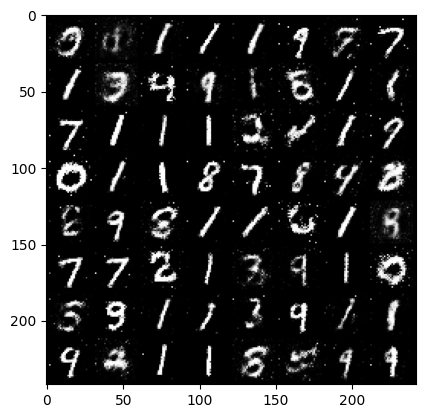

Epoch [37/50] Batch 0/938                   Loss D: 0.9150, loss G: 1.7085
Epoch [37/50] Batch 100/938                   Loss D: 0.8272, loss G: 1.8454
Epoch [37/50] Batch 200/938                   Loss D: 0.6962, loss G: 1.7190
Epoch [37/50] Batch 300/938                   Loss D: 1.0501, loss G: 1.7090
Epoch [37/50] Batch 400/938                   Loss D: 0.8809, loss G: 1.9284
Epoch [37/50] Batch 500/938                   Loss D: 0.7614, loss G: 2.4929
Epoch [37/50] Batch 600/938                   Loss D: 0.7623, loss G: 1.3490
Epoch [37/50] Batch 700/938                   Loss D: 0.7493, loss G: 2.0999
Epoch [37/50] Batch 800/938                   Loss D: 0.7710, loss G: 1.5705
Epoch [37/50] Batch 900/938                   Loss D: 0.8519, loss G: 1.5323


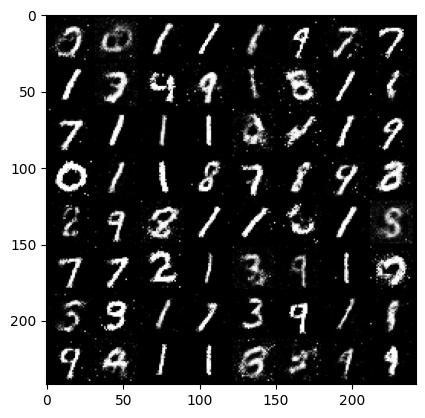

Epoch [38/50] Batch 0/938                   Loss D: 0.5642, loss G: 2.1233
Epoch [38/50] Batch 100/938                   Loss D: 0.6586, loss G: 1.8733
Epoch [38/50] Batch 200/938                   Loss D: 0.9171, loss G: 1.5872
Epoch [38/50] Batch 300/938                   Loss D: 0.6757, loss G: 2.0495
Epoch [38/50] Batch 400/938                   Loss D: 0.9413, loss G: 1.5835
Epoch [38/50] Batch 500/938                   Loss D: 0.7509, loss G: 1.9066
Epoch [38/50] Batch 600/938                   Loss D: 0.8760, loss G: 1.4649
Epoch [38/50] Batch 700/938                   Loss D: 1.0897, loss G: 2.4929
Epoch [38/50] Batch 800/938                   Loss D: 0.7880, loss G: 1.8283
Epoch [38/50] Batch 900/938                   Loss D: 0.6545, loss G: 1.8969


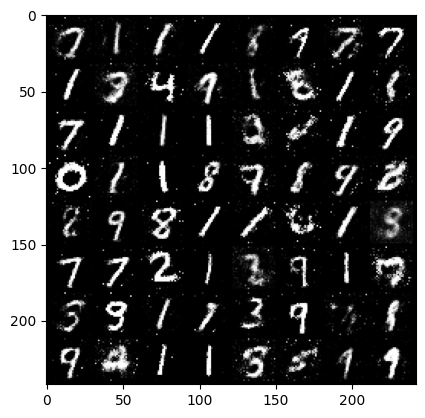

Epoch [39/50] Batch 0/938                   Loss D: 0.8988, loss G: 1.9252
Epoch [39/50] Batch 100/938                   Loss D: 0.8598, loss G: 1.4022
Epoch [39/50] Batch 200/938                   Loss D: 0.9569, loss G: 1.4394
Epoch [39/50] Batch 300/938                   Loss D: 0.9134, loss G: 1.5491
Epoch [39/50] Batch 400/938                   Loss D: 1.1341, loss G: 1.5222
Epoch [39/50] Batch 500/938                   Loss D: 0.6376, loss G: 1.9338
Epoch [39/50] Batch 600/938                   Loss D: 0.8609, loss G: 1.7409
Epoch [39/50] Batch 700/938                   Loss D: 0.6956, loss G: 1.8303
Epoch [39/50] Batch 800/938                   Loss D: 0.7730, loss G: 2.2473
Epoch [39/50] Batch 900/938                   Loss D: 0.9543, loss G: 1.6132


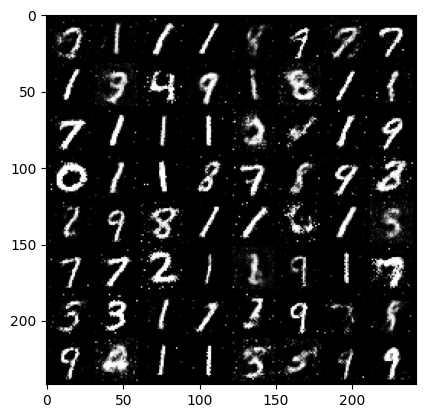

Epoch [40/50] Batch 0/938                   Loss D: 0.6105, loss G: 1.8111
Epoch [40/50] Batch 100/938                   Loss D: 0.9705, loss G: 1.8408
Epoch [40/50] Batch 200/938                   Loss D: 0.8538, loss G: 1.7467
Epoch [40/50] Batch 300/938                   Loss D: 0.8483, loss G: 1.3163
Epoch [40/50] Batch 400/938                   Loss D: 0.6551, loss G: 2.0428
Epoch [40/50] Batch 500/938                   Loss D: 1.0549, loss G: 1.8147
Epoch [40/50] Batch 600/938                   Loss D: 0.7487, loss G: 2.0034
Epoch [40/50] Batch 700/938                   Loss D: 0.7563, loss G: 1.7746
Epoch [40/50] Batch 800/938                   Loss D: 0.8504, loss G: 1.7884
Epoch [40/50] Batch 900/938                   Loss D: 0.7946, loss G: 1.6005


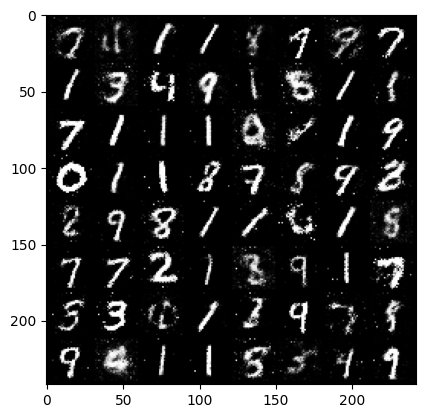

Epoch [41/50] Batch 0/938                   Loss D: 0.7809, loss G: 1.7908
Epoch [41/50] Batch 100/938                   Loss D: 0.9977, loss G: 1.7666
Epoch [41/50] Batch 200/938                   Loss D: 0.7903, loss G: 1.5030
Epoch [41/50] Batch 300/938                   Loss D: 0.7945, loss G: 2.0043
Epoch [41/50] Batch 400/938                   Loss D: 0.9156, loss G: 1.9003
Epoch [41/50] Batch 500/938                   Loss D: 0.8244, loss G: 1.7146
Epoch [41/50] Batch 600/938                   Loss D: 0.8044, loss G: 2.1282
Epoch [41/50] Batch 700/938                   Loss D: 0.6695, loss G: 1.8178
Epoch [41/50] Batch 800/938                   Loss D: 0.9461, loss G: 1.7186
Epoch [41/50] Batch 900/938                   Loss D: 0.6841, loss G: 1.5803


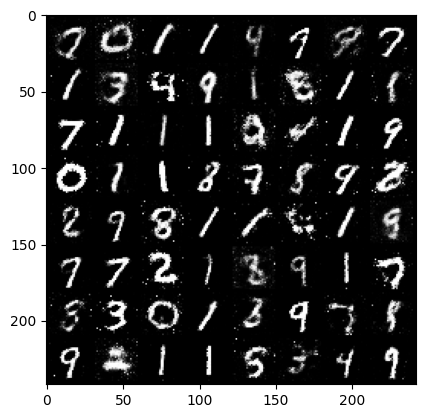

Epoch [42/50] Batch 0/938                   Loss D: 1.1041, loss G: 1.4797
Epoch [42/50] Batch 100/938                   Loss D: 0.8926, loss G: 1.4532
Epoch [42/50] Batch 200/938                   Loss D: 0.7869, loss G: 1.9826
Epoch [42/50] Batch 300/938                   Loss D: 0.8324, loss G: 1.7554
Epoch [42/50] Batch 400/938                   Loss D: 0.8998, loss G: 1.4247
Epoch [42/50] Batch 500/938                   Loss D: 0.8409, loss G: 1.3588
Epoch [42/50] Batch 600/938                   Loss D: 0.7826, loss G: 1.2994
Epoch [42/50] Batch 700/938                   Loss D: 0.7074, loss G: 1.9784
Epoch [42/50] Batch 800/938                   Loss D: 0.8518, loss G: 1.5899
Epoch [42/50] Batch 900/938                   Loss D: 0.9026, loss G: 1.8156


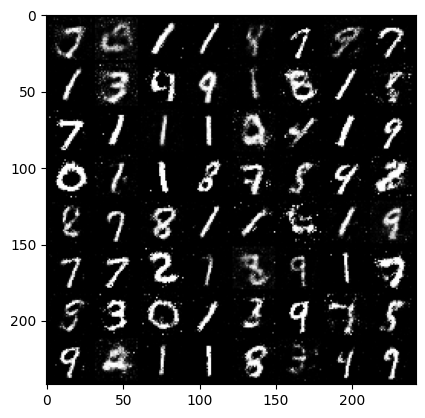

Epoch [43/50] Batch 0/938                   Loss D: 0.8154, loss G: 1.8003
Epoch [43/50] Batch 100/938                   Loss D: 0.7696, loss G: 1.9800
Epoch [43/50] Batch 200/938                   Loss D: 0.8694, loss G: 1.4213
Epoch [43/50] Batch 300/938                   Loss D: 0.7605, loss G: 1.7426
Epoch [43/50] Batch 400/938                   Loss D: 0.7853, loss G: 1.8916
Epoch [43/50] Batch 500/938                   Loss D: 0.9862, loss G: 1.8464
Epoch [43/50] Batch 600/938                   Loss D: 1.0356, loss G: 1.9439
Epoch [43/50] Batch 700/938                   Loss D: 0.9701, loss G: 1.5701
Epoch [43/50] Batch 800/938                   Loss D: 0.9283, loss G: 1.4136
Epoch [43/50] Batch 900/938                   Loss D: 1.0855, loss G: 1.1756


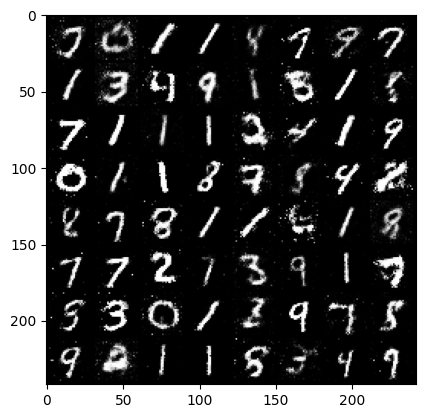

Epoch [44/50] Batch 0/938                   Loss D: 1.0523, loss G: 1.6963
Epoch [44/50] Batch 100/938                   Loss D: 1.0954, loss G: 1.5892
Epoch [44/50] Batch 200/938                   Loss D: 1.2641, loss G: 1.0230
Epoch [44/50] Batch 300/938                   Loss D: 0.9688, loss G: 1.1261
Epoch [44/50] Batch 400/938                   Loss D: 1.0148, loss G: 1.8118
Epoch [44/50] Batch 500/938                   Loss D: 0.8579, loss G: 2.3463
Epoch [44/50] Batch 600/938                   Loss D: 0.8047, loss G: 2.5867
Epoch [44/50] Batch 700/938                   Loss D: 0.7292, loss G: 1.7968
Epoch [44/50] Batch 800/938                   Loss D: 0.9199, loss G: 1.4228
Epoch [44/50] Batch 900/938                   Loss D: 0.8045, loss G: 1.7777


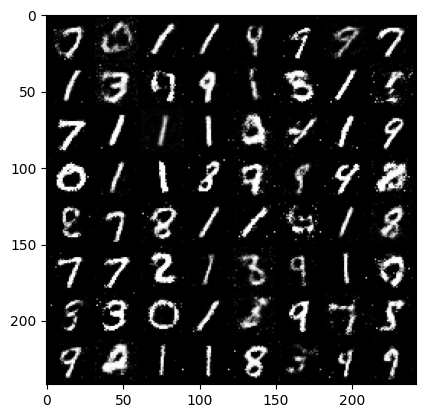

Epoch [45/50] Batch 0/938                   Loss D: 0.9842, loss G: 2.0374
Epoch [45/50] Batch 100/938                   Loss D: 0.8151, loss G: 1.7686
Epoch [45/50] Batch 200/938                   Loss D: 0.8322, loss G: 1.8319
Epoch [45/50] Batch 300/938                   Loss D: 0.9223, loss G: 1.7451
Epoch [45/50] Batch 400/938                   Loss D: 0.8475, loss G: 1.6004
Epoch [45/50] Batch 500/938                   Loss D: 0.8668, loss G: 1.6013
Epoch [45/50] Batch 600/938                   Loss D: 0.8048, loss G: 1.4303
Epoch [45/50] Batch 700/938                   Loss D: 0.8755, loss G: 1.4610
Epoch [45/50] Batch 800/938                   Loss D: 0.8279, loss G: 1.2575
Epoch [45/50] Batch 900/938                   Loss D: 0.8769, loss G: 1.8272


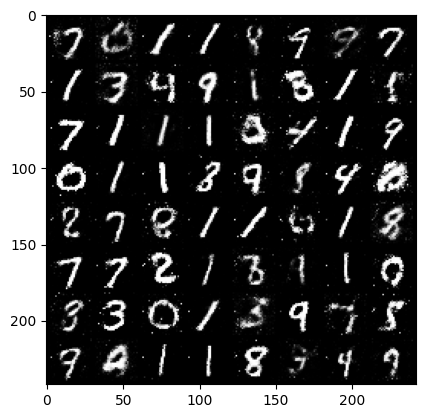

Epoch [46/50] Batch 0/938                   Loss D: 1.0179, loss G: 1.1581
Epoch [46/50] Batch 100/938                   Loss D: 0.7798, loss G: 1.7314
Epoch [46/50] Batch 200/938                   Loss D: 0.8057, loss G: 1.6670
Epoch [46/50] Batch 300/938                   Loss D: 0.6860, loss G: 1.9538
Epoch [46/50] Batch 400/938                   Loss D: 0.6941, loss G: 2.0457
Epoch [46/50] Batch 500/938                   Loss D: 1.0429, loss G: 1.5446
Epoch [46/50] Batch 600/938                   Loss D: 0.7956, loss G: 1.7121
Epoch [46/50] Batch 700/938                   Loss D: 0.9650, loss G: 2.0164
Epoch [46/50] Batch 800/938                   Loss D: 0.9377, loss G: 1.8753
Epoch [46/50] Batch 900/938                   Loss D: 0.8862, loss G: 1.5874


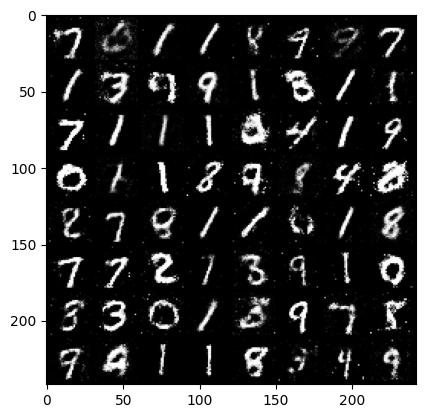

Epoch [47/50] Batch 0/938                   Loss D: 0.7787, loss G: 1.5929
Epoch [47/50] Batch 100/938                   Loss D: 0.8230, loss G: 1.6889
Epoch [47/50] Batch 200/938                   Loss D: 0.7813, loss G: 1.5948
Epoch [47/50] Batch 300/938                   Loss D: 0.8049, loss G: 1.5693
Epoch [47/50] Batch 400/938                   Loss D: 0.8041, loss G: 1.5729
Epoch [47/50] Batch 500/938                   Loss D: 0.7879, loss G: 2.2630
Epoch [47/50] Batch 600/938                   Loss D: 0.8577, loss G: 1.4085
Epoch [47/50] Batch 700/938                   Loss D: 0.7074, loss G: 1.8691
Epoch [47/50] Batch 800/938                   Loss D: 0.9020, loss G: 1.6044
Epoch [47/50] Batch 900/938                   Loss D: 0.8584, loss G: 1.8617


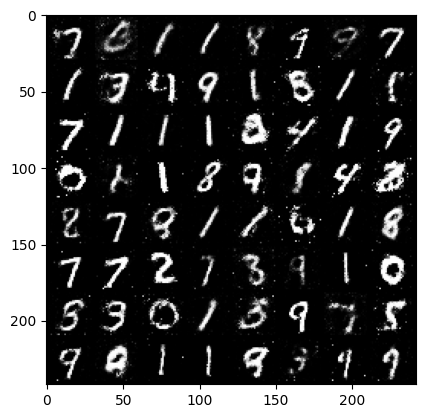

Epoch [48/50] Batch 0/938                   Loss D: 0.9297, loss G: 1.5526
Epoch [48/50] Batch 100/938                   Loss D: 0.9582, loss G: 1.7880
Epoch [48/50] Batch 200/938                   Loss D: 0.7222, loss G: 1.5738
Epoch [48/50] Batch 300/938                   Loss D: 0.9182, loss G: 1.9106
Epoch [48/50] Batch 400/938                   Loss D: 1.1132, loss G: 1.0744
Epoch [48/50] Batch 500/938                   Loss D: 1.0756, loss G: 1.3539
Epoch [48/50] Batch 600/938                   Loss D: 0.7536, loss G: 1.2646
Epoch [48/50] Batch 700/938                   Loss D: 0.8399, loss G: 1.5108
Epoch [48/50] Batch 800/938                   Loss D: 0.8098, loss G: 2.0669
Epoch [48/50] Batch 900/938                   Loss D: 0.9093, loss G: 1.4162


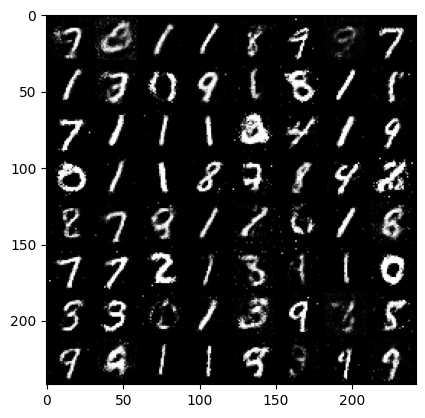

Epoch [49/50] Batch 0/938                   Loss D: 0.7832, loss G: 1.9812
Epoch [49/50] Batch 100/938                   Loss D: 0.9207, loss G: 1.6465
Epoch [49/50] Batch 200/938                   Loss D: 0.7558, loss G: 1.6472
Epoch [49/50] Batch 300/938                   Loss D: 0.9263, loss G: 1.3026
Epoch [49/50] Batch 400/938                   Loss D: 0.9007, loss G: 1.5155
Epoch [49/50] Batch 500/938                   Loss D: 0.8402, loss G: 1.8993
Epoch [49/50] Batch 600/938                   Loss D: 0.7194, loss G: 1.4751
Epoch [49/50] Batch 700/938                   Loss D: 0.9730, loss G: 1.6381
Epoch [49/50] Batch 800/938                   Loss D: 1.0590, loss G: 1.0830
Epoch [49/50] Batch 900/938                   Loss D: 0.9012, loss G: 1.9022


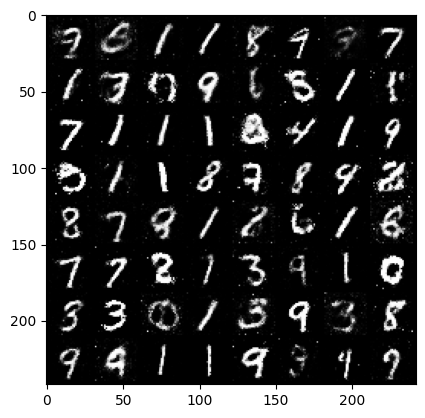

Epoch [50/50] Batch 0/938                   Loss D: 0.7714, loss G: 1.9090
Epoch [50/50] Batch 100/938                   Loss D: 0.8137, loss G: 1.6287
Epoch [50/50] Batch 200/938                   Loss D: 1.0463, loss G: 2.1429
Epoch [50/50] Batch 300/938                   Loss D: 0.9325, loss G: 2.0167
Epoch [50/50] Batch 400/938                   Loss D: 0.7811, loss G: 1.7621
Epoch [50/50] Batch 500/938                   Loss D: 0.8258, loss G: 1.1002
Epoch [50/50] Batch 600/938                   Loss D: 0.7959, loss G: 1.9102
Epoch [50/50] Batch 700/938                   Loss D: 0.6554, loss G: 2.0071
Epoch [50/50] Batch 800/938                   Loss D: 0.8446, loss G: 1.6500
Epoch [50/50] Batch 900/938                   Loss D: 0.9414, loss G: 1.5489


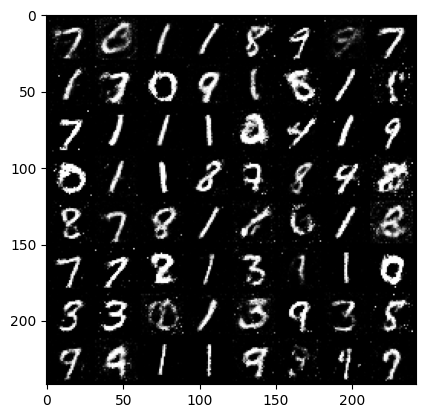

In [ ]:
num_epochs = 50
fixed_noise = torch.randn(64, 100, device=device)

for epoch in range(num_epochs):
    for i, (data, _) in enumerate(train_loader):
        D.zero_grad()
        real_data = data.to(device)
        b_size = real_data.size(0)
        label = torch.full((b_size,), 1, dtype=torch.float, device=device)

        output = D(real_data).view(-1)
        errD_real = criterion(output, label)
        errD_real.backward()

        noise = torch.randn(b_size, 100, device=device)
        fake_data = G(noise)
        label.fill_(0)

        output = D(fake_data.detach()).view(-1)
        errD_fake = criterion(output, label)
        errD_fake.backward()

        optimizerD.step()

        G.zero_grad()
        label.fill_(1)

        output = D(fake_data).view(-1)
        errG = criterion(output, label)
        errG.backward()

        optimizerG.step()

        if i % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}] Batch {i}/{len(train_loader)} \
                  Loss D: {errD_real+errD_fake:.4f}, loss G: {errG:.4f}')

    with torch.no_grad():
        fake = G(fixed_noise).detach().cpu()
    grid = np.transpose(vutils.make_grid(fake, padding=2, normalize=True), (1, 2, 0))
    plt.imshow(grid)
    plt.show()


در ابتدا، تصاویر تولید شده توسط Generator کیفیت پایینی داشتند و به‌سختی قابل تشخیص بودند.
با پیشرفت آموزش، کیفیت تصاویر بهبود یافت و تصاویر تولید شده به تصاویر واقعی نزدیک‌تر شدند.
در پایان دوره‌های آموزشی، Generator قادر به تولید تصاویر دست‌نوشته با کیفیت بالا بود که به سختی از تصاویر واقعی قابل تشخیص بودند.